In [30]:
import numpy as np
import pandas as pd
# from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [24]:
# Some preprocessing steps
features_df = pd.read_csv('data/adult_data_features.csv')

# Replacing "?" with np.NaN
features_df = features_df.replace("?", np.NaN)

# Dropping all rows with one or more null attributes
features_df = features_df.dropna()

# Dropping 'education' column since 'education-num' is the same column in numerical format
# Dropping 'fnlgwt' since don't know what it means
# features_df[['education', 'education-num']]
features_df = features_df.drop(['education', 'fnlwgt'], axis=1)

# Converting all categorical variables using one hot encoding
features_df = pd.get_dummies(features_df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'sex'], dtype='int')

# Changing dtype to float
features_df = features_df.astype('float')

display(features_df)

# Get corresponding labels
labels = pd.read_csv('data/adult_data_targets.csv')
labels = labels.loc[features_df.index, :]

# Sanitizing the labels by replacing "<=50K." with "<=50K" and ">50K." with ">50K"
labels.replace({"<=50K.": "<=50K", ">50K.": ">50K"}, inplace=True)

# Change the labels to 0 and 1
labels = labels.map(lambda x : 1.0 if x == ">50K" else 0.0)

labels.value_counts()


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male
0,39.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,50.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,38.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,53.0,7.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48837,39.0,13.0,0.0,0.0,36.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48839,38.0,13.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48840,44.0,13.0,5455.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


income
0.0       34014
1.0       11208
Name: count, dtype: int64

In [12]:
labels.to_numpy().reshape(-1)

array([0., 0., 0., ..., 0., 0., 1.])

In [18]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels.to_numpy().reshape(-1), test_size=0.2, random_state=41)

# Step 4: Initialize the KNN classifier with k=3
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Step 5: Train the model
    knn.fit(X_train, y_train)

    # Step 6: Make predictions
    y_pred = knn.predict(X_test)

    # Step 7: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k = {k}: {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred))
    print('-'*50)

Accuracy for k = 1: 81.38%
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      6744
         1.0       0.63      0.64      0.64      2301

    accuracy                           0.81      9045
   macro avg       0.75      0.76      0.76      9045
weighted avg       0.81      0.81      0.81      9045

--------------------------------------------------
Accuracy for k = 2: 83.31%
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.89      6744
         1.0       0.76      0.50      0.60      2301

    accuracy                           0.83      9045
   macro avg       0.80      0.72      0.75      9045
weighted avg       0.83      0.83      0.82      9045

--------------------------------------------------
Accuracy for k = 3: 83.48%
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      6744
         1.0       0.69      0.65      0.67      2301


In [19]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels.to_numpy().reshape(-1), test_size=0.2, random_state=41)

# Step 4: Initialize the KNN classifier with k=3
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')

    # Step 5: Train the model
    knn.fit(X_train, y_train)

    # Step 6: Make predictions
    y_pred = knn.predict(X_test)

    # Step 7: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k = {k}: {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred))
    print('-'*50)

Accuracy for k = 1: 81.38%
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      6744
         1.0       0.63      0.64      0.64      2301

    accuracy                           0.81      9045
   macro avg       0.75      0.76      0.76      9045
weighted avg       0.81      0.81      0.81      9045

--------------------------------------------------
Accuracy for k = 2: 82.58%
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      6744
         1.0       0.69      0.58      0.63      2301

    accuracy                           0.83      9045
   macro avg       0.78      0.74      0.76      9045
weighted avg       0.82      0.83      0.82      9045

--------------------------------------------------
Accuracy for k = 3: 83.44%
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      6744
         1.0       0.69      0.65      0.66      2301


In [21]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels.to_numpy().reshape(-1), test_size=0.2, random_state=42)

# Step 4: Initialize the KNN classifier with k=3
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)

    # Step 5: Train the model
    knn.fit(X_train, y_train)

    # Step 6: Make predictions
    y_pred = knn.predict(X_test)

    # Step 7: Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k = {k}: {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred))
    print('-'*50)

Accuracy for k = 1: 82.18%
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      6745
         1.0       0.64      0.67      0.66      2300

    accuracy                           0.82      9045
   macro avg       0.76      0.77      0.77      9045
weighted avg       0.82      0.82      0.82      9045

--------------------------------------------------
Accuracy for k = 2: 83.81%
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      6745
         1.0       0.72      0.60      0.65      2300

    accuracy                           0.84      9045
   macro avg       0.79      0.76      0.77      9045
weighted avg       0.83      0.84      0.83      9045

--------------------------------------------------
Accuracy for k = 3: 84.17%
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      6745
         1.0       0.70      0.66      0.68      2300


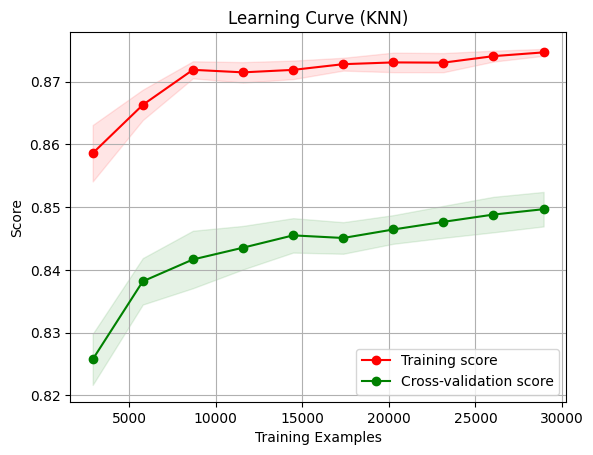

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels.to_numpy().reshape(-1), test_size=0.2, random_state=42)

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier(n_neighbors=10)

# Define a 5-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve (KNN)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
# plt.ylim(0.0, 1.1)
plt.grid()

# Plot the mean scores with standard deviation as shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

# Plot the mean scores
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()

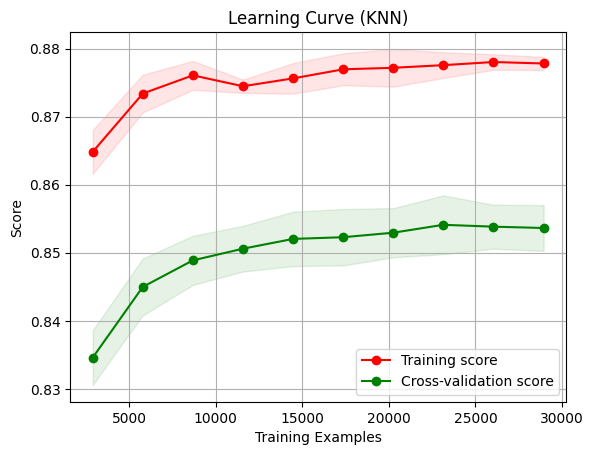

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels.to_numpy().reshape(-1), test_size=0.2, random_state=42)

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier(n_neighbors=10, p=1) # Manhattan distance

# Define a 5-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve (KNN)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
# plt.ylim(0.0, 1.1)
plt.grid()

# Plot the mean scores with standard deviation as shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

# Plot the mean scores
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()

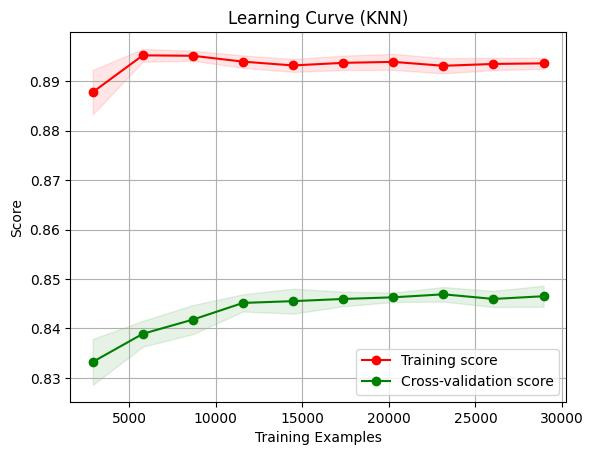

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels.to_numpy().reshape(-1), test_size=0.2, random_state=42)

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier(n_neighbors=4, p=1) # Manhattan distance

# Define a 5-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', random_state=42
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve (KNN)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
# plt.ylim(0.0, 1.1)
plt.grid()

# Plot the mean scores with standard deviation as shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

# Plot the mean scores
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()

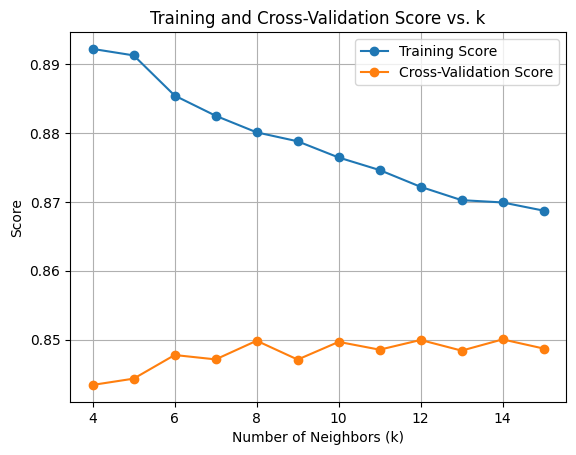

In [33]:
# Define the range of k values
k_values = range(4, 16)

# Lists to store the mean training and cross-validation errors
train_errors = []
cv_errors = []

# 5-fold cross-validator with a fixed random seed for reproducibility
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Compute the training error
    knn.fit(X_train, y_train)
    train_error = knn.score(X_train, y_train)
    train_errors.append(train_error)
    
    # Compute the cross-validation error
    cv_error = np.mean(cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1))
    cv_errors.append(cv_error)

# Plot the training and cross-validation errors
plt.figure()
plt.plot(k_values, train_errors, label='Training Score', marker='o')
plt.plot(k_values, cv_errors, label='Cross-Validation Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Training and Cross-Validation Score vs. k')
plt.legend()
plt.grid(True)
plt.show()

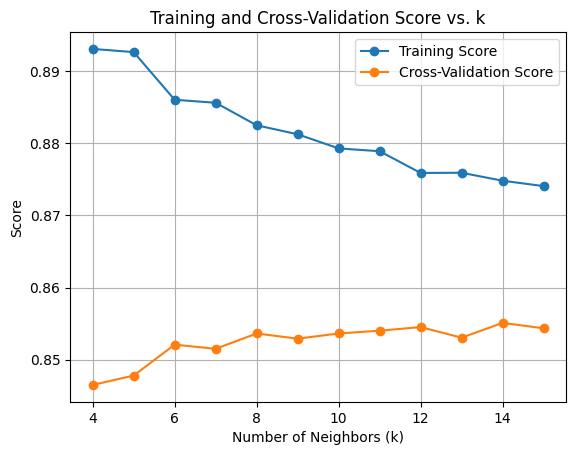

In [34]:
# Define the range of k values
k_values = range(4, 16)

# Lists to store the mean training and cross-validation errors
train_errors = []
cv_errors = []

# 5-fold cross-validator with a fixed random seed for reproducibility
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    
    # Compute the training error
    knn.fit(X_train, y_train)
    train_error = knn.score(X_train, y_train)
    train_errors.append(train_error)
    
    # Compute the cross-validation error
    cv_error = np.mean(cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1))
    cv_errors.append(cv_error)

# Plot the training and cross-validation errors
plt.figure()
plt.plot(k_values, train_errors, label='Training Score', marker='o')
plt.plot(k_values, cv_errors, label='Cross-Validation Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Training and Cross-Validation Score vs. k')
plt.legend()
plt.grid(True)
plt.show()

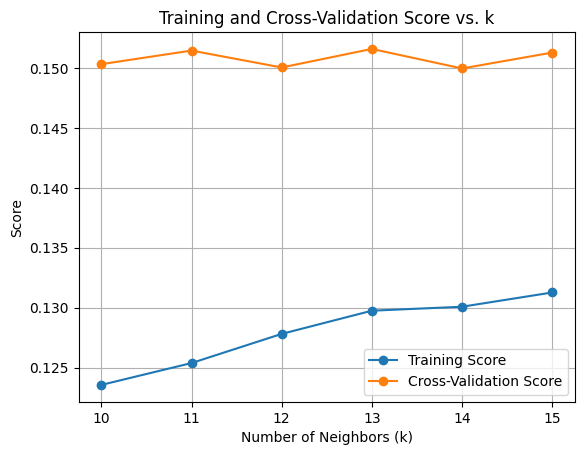

In [35]:
# Define the range of k values
k_values = range(10, 16)

# Lists to store the mean training and cross-validation errors
train_errors = []
cv_errors = []

# 5-fold cross-validator with a fixed random seed for reproducibility
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Compute the training error
    knn.fit(X_train, y_train)
    train_error = 1 - knn.score(X_train, y_train)
    train_errors.append(train_error)
    
    # Compute the cross-validation error
    cv_error = 1 - np.mean(cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1))
    cv_errors.append(cv_error)

# Plot the training and cross-validation errors
plt.figure()
plt.plot(k_values, train_errors, label='Training Score', marker='o')
plt.plot(k_values, cv_errors, label='Cross-Validation Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Training and Cross-Validation Score vs. k')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)

# Compute the training error
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [40]:
knn = KNeighborsClassifier(n_neighbors=12)

# Step 5: Train the model
knn.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for k = {12}: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))
print('-'*50)

Accuracy for k = 12: 85.47%
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      6745
         1.0       0.77      0.61      0.68      2300

    accuracy                           0.85      9045
   macro avg       0.82      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045

--------------------------------------------------


Dataset 2

In [41]:
features_df = pd.read_csv('data/breast_cancer_data_features.csv')
labels = pd.read_csv('data/breast_cancer_data_targets.csv')

labels = labels.map(lambda x : 0 if x == 'B' else 1)

labels.value_counts()

Diagnosis
0            357
1            212
Name: count, dtype: int64

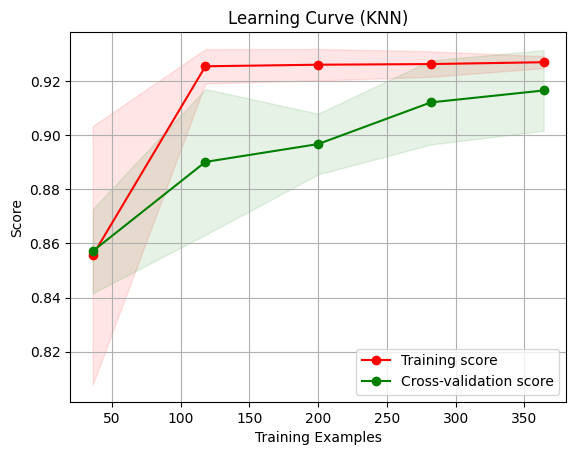

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels.to_numpy().reshape(-1), test_size=0.2, random_state=42)

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier(n_neighbors=15, p=2)

# Define a 5-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', random_state=42
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve (KNN)')
plt.xlabel('Training Examples')
plt.ylabel('Score')
# plt.ylim(0.0, 1.1)
plt.grid()

# Plot the mean scores with standard deviation as shaded area
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

# Plot the mean scores
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()

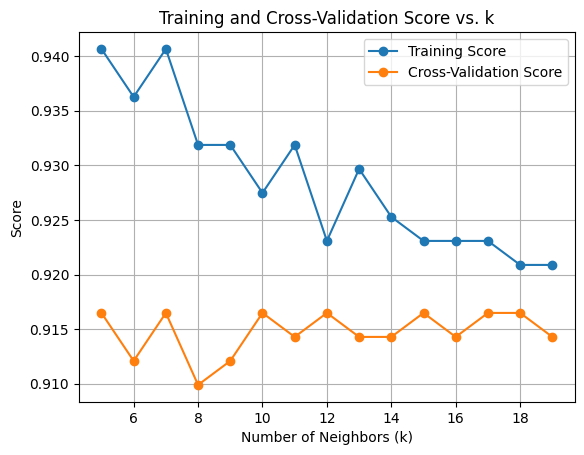

In [52]:
# Define the range of k values
k_values = range(5, 20)

# Lists to store the mean training and cross-validation errors
train_errors = []
cv_errors = []

# 5-fold cross-validator with a fixed random seed for reproducibility
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Compute the training error
    knn.fit(X_train, y_train)
    train_error = knn.score(X_train, y_train)
    train_errors.append(train_error)
    
    # Compute the cross-validation error
    cv_error = np.mean(cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1))
    cv_errors.append(cv_error)

# Plot the training and cross-validation errors
plt.figure()
plt.plot(k_values, train_errors, label='Training Score', marker='o')
plt.plot(k_values, cv_errors, label='Cross-Validation Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Training and Cross-Validation Score vs. k')
plt.legend()
plt.grid(True)
plt.show()

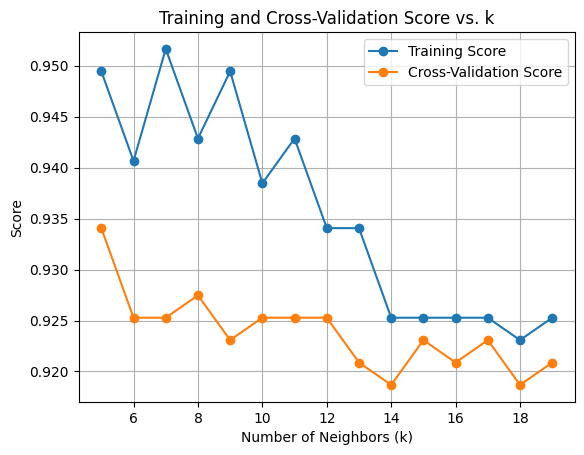

In [53]:
# Define the range of k values
k_values = range(5, 20)

# Lists to store the mean training and cross-validation errors
train_errors = []
cv_errors = []

# 5-fold cross-validator with a fixed random seed for reproducibility
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    
    # Compute the training error
    knn.fit(X_train, y_train)
    train_error = knn.score(X_train, y_train)
    train_errors.append(train_error)
    
    # Compute the cross-validation error
    cv_error = np.mean(cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1))
    cv_errors.append(cv_error)

# Plot the training and cross-validation errors
plt.figure()
plt.plot(k_values, train_errors, label='Training Score', marker='o')
plt.plot(k_values, cv_errors, label='Cross-Validation Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Training and Cross-Validation Score vs. k')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)

# Step 5: Train the model
knn.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for k = {12}: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))
print('-'*50)

Accuracy for k = 12: 95.61%
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

--------------------------------------------------
